In [1]:
# !pip install tensorflow-datasets
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import GlobalMaxPooling2D
# определение входных данных(8 массивов с 8 элементами)
data = [[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 0]]
data = asarray(data) #Матрица — это объект неизменяемого типа. Для внесения изменений
#можно использовать функцию asarray()
data = data.reshape(1, 8, 8, 1)#Reshape - это процесс изменения формы массива без изменения
#его содержимого.Основная идея состоит в том, чтобы изменить многомерный массив (тензор)
#в другую форму, сохраняя при этом общее количество элементов,чтобы они могли быть более
# эффективно обработаны нейронными сетями.

# создание модели
model = Sequential()
model.add(Conv2D(1, (3,3), activation='relu', input_shape=(8, 8, 1)))
model.add(GlobalMaxPooling2D())
# вывод описания созданной модели
model.summary()
# определение дектора вертикальной линии
detector = [[[[0]],[[1]],[[0]]],
[[[0]],[[1]],[[0]]],
[[[0]],[[1]],[[0]]]]
weights = [asarray(detector), asarray([0.0])]
# сохранение весов в модель
model.set_weights(weights)
# применение фильтра к входным данным
yhat = model.predict(data)
print(yhat)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 6, 1)           10        
                                                                 
 global_max_pooling2d (Globa  (None, 1)                0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 281ms/step
[[3.]]


In [5]:
import cv2
import numpy as np
from scipy import misc
I = misc.ascent() # получаем 8-битное изображение в оттенках серого с битовой глубиной 512х512

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15236\1882465512.py:4: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  I = misc.ascent() # получаем 8-битное изображение в оттенках серого с битовой глубиной 512х512


In [6]:
I.shape

(512, 512)

In [7]:
I[101:131,120:130]

array([[ 98, 100, 101, 102, 101, 102, 101,  89,  83,  88],
       [100, 103, 102, 102, 101,  92,  81,  89,  92,  82],
       [102, 103, 101,  94,  86,  87,  98,  82,  67,  84],
       [103,  96,  85,  88,  98,  90,  63,  58,  88,  97],
       [ 90,  92,  99,  92,  67,  49,  63,  93,  97,  95],
       [ 98,  92,  68,  51,  64,  90, 100,  97,  98,  99],
       [ 71,  48,  63,  88, 102, 101,  97,  97,  98,  98],
       [ 64,  85, 102, 104,  97,  95,  97,  98,  97,  98],
       [ 99, 103, 101, 100,  97,  98,  98,  97,  98,  97],
       [ 98, 101,  99,  99,  97,  97,  97,  98,  97,  98],
       [100, 100,  99,  97,  97,  97,  98,  97,  97,  99],
       [101, 100,  99,  97,  99, 100,  99,  97,  97,  98],
       [101, 101,  98,  98,  99, 101,  98,  98,  98,  98],
       [100,  99, 102, 100,  99,  97,  97,  98, 100, 100],
       [100,  99, 101, 101,  99,  98,  98,  99, 101, 100],
       [101, 101, 100, 101, 101, 101, 101, 101, 100, 101],
       [101, 101, 100,  99, 100, 101, 100, 101, 101,  99

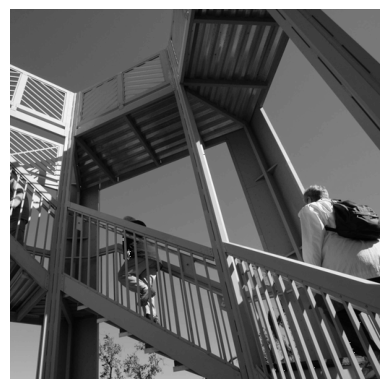

In [8]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.axis('off')
plt.imshow(I)
plt.show()

СОздаем копию массива I с помощью функции np.copy(). Копия сохраняется в переменной I_transformed. Затем размеры копии I_transformed сохраняются в переменные size_x и size_y. size_x содержит количество строк в I_transformed, а size_y содержит количество столбцов.

In [9]:
I_transformed = np.copy(I)
size_x = I_transformed.shape[0]
size_y = I_transformed.shape[1]

Определяем матрицу фильтра и вес для свертки изображения. Фильтр можно использовать для применения различных эффектов к изображению, таких как размытие, усиление краев или обнаружение границ. В данном случае, определен фильтр, который помогает обнаружить вертикальные края на изображении.

- Первый фильтр является простым фильтром усреднения, представленным матрицей размером 3x3. Каждый элемент матрицы имеет значение 1. Вес для свертки установлен равным 15.

- Второй фильтр представляет собой фильтр усиления краев. Он помогает выделить контуры объектов на изображении. Он также имеет размер 3x3 и содержит значения [0, 1, 0, 1, -4, 1, 0, 1, 0].

- Третий фильтр похож на второй, но с некоторым изменением в значениях элементов матрицы. Он состоит из следующих значений: [-1, -2, -1, 1, -4, 1, 0, 1, 0].

- Последний фильтр является фильтром Собеля и применяется для обнаружения вертикальных или горизонтальных краев на изображении. Он состоит из следующих значений: [-1, 0, 1, -2, 0, 2, -1, 0, 1].

Вес для свертки установлен равным 1 и указывает, что каждый элемент фильтра будет умножаться на соответствующий пиксель изображения.

In [10]:
# Фильтр усреднения
# filter = np.array([ [1, 1, 1], [1, 1, 1], [1, 1, 1]])/15

# Фильтр края. Контуры изображения
# filter = np.array([ [0, 1, 0], [1, -4, 1], [0, 1, 0]])

# filter = np.array([ [-1, -2, -1], [1, -4, 1], [0, 1, 0]])

# Фильтр Собеля. Для обнаржения вертикальных и горизонтальных значений
filter = np.array([ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

#зададим вес для свертки
weight = 1

In [11]:
np.array(filter).shape

(3, 3)

In [12]:
np.array(filter).T

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

#### Свертка

In [13]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
    convolution = 0.0
    convolution = convolution + (I[x - 1, y-1] * filter[0][0])
    convolution = convolution + (I[x, y-1] * filter[0][1])
    convolution = convolution + (I[x + 1, y-1] * filter[0][2])
    convolution = convolution + (I[x-1, y] * filter[1][0])
    convolution = convolution + (I[x, y] * filter[1][1])
    convolution = convolution + (I[x+1, y] * filter[1][2])
    convolution = convolution + (I[x-1, y+1] * filter[2][0])
    convolution = convolution + (I[x, y+1] * filter[2][1])
    convolution = convolution + (I[x+1, y+1] * filter[2][2])
    if(convolution<0):
      convolution=-convolution
    if(convolution>255):
      convolution=255
    I_transformed[x, y] = convolution

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15236\2493784486.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


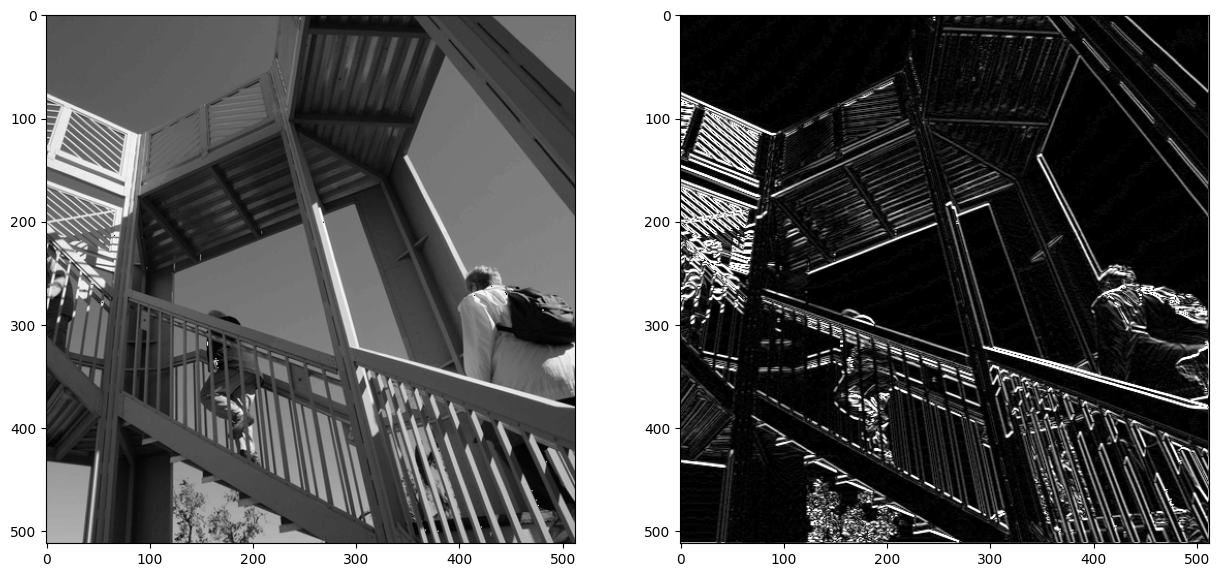

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15236\2493784486.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


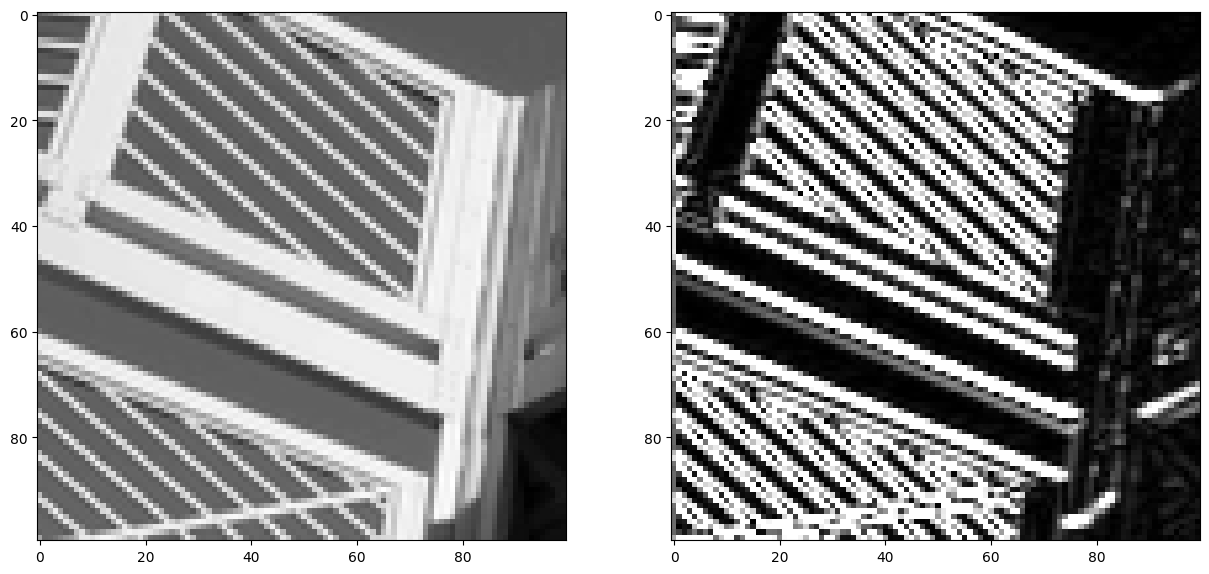

In [14]:
plt.figure(figsize=(15, 7))
plt.grid(False)
plt.gray()
#plt.axis('off')
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(I_transformed)
plt.show()

ymin,ymax,xmin,xmax = 100,200,0,100

plt.figure(figsize=(15, 7))
plt.grid(False)
plt.gray()
#plt.axis('off')
plt.subplot(1,2,1)
plt.imshow(I[ymin:ymax,xmin:xmax])
plt.subplot(1,2,2)
plt.imshow(I_transformed[ymin:ymax,xmin:xmax])
plt.show()

## Пример создания сверточных и пуллинг слоев на Keras

In [ ]:
import numpy as np

In [ ]:
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape((3, 3))
B = np.array([3, 0, 2, 4, 5, 1, 5, 2, 1]).reshape((3, 3))
print(A)
np.sum(A)


In [ ]:
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]

In [ ]:
data = np.array(data)
data

In [ ]:
data = data.reshape(1, 8, 8, 1)
data

In [ ]:
from numpy import asarray
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D

# определение входных данных(8 массивов с 8 элементами)
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 1, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 1],
		[0, 0, 0, 1, 1, 0, 0, 0]]

data = asarray(data)
data = data.reshape(1, 8, 8, 1)

# создание модели
x_input = Input(shape=(8,8,1))
x_conv = Conv2D( 1, (3,3), strides=(1,1), activation='relu', padding='same')(x_input)
x_pool = GlobalMaxPooling2D( )(x_conv)

model = Model(x_input,x_pool)
model_conv = Model(x_input,x_conv)

# вывод описания созданной модели
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

# Display the graphical model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
plt.imshow(data[0,:,:,0])
plt.show()

In [ ]:
hh = model.layers[-2]
hh

In [ ]:
w_old = model.layers[-2].get_weights()
w_old

In [ ]:
model.layers[-1].get_weights()

In [ ]:
w_old[0].shape

In [ ]:
# определение дектора вертикальной линии
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [asarray(detector), asarray([0.0])]

# сохранение весов в модель
model.set_weights(weights)

# применение фильтра к входным данным
yhat = model.predict(data)

print(yhat[0].T)

## Нейронная сеть Lenet5.

Lenet5 - это одна из первых сверточных нейронных сетей и она отражает характерные для сверточных нейронных сетей набор элементов - сверточные слои, пуллинг слои и полносвязные слои на конце нейронной сети. Данная архитектура послужила основой для многих современных архитектур сверточных нейронных сетей.

In [17]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras import utils
# from keras.utils import to_categorical
import keras.utils as np_utils

# загрузка тренировочных и тестовых данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# конвертация чисел из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализация данных [0, 1]
x_train /= 255
x_test /= 255

# трансформация лейблов в one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [18]:
from keras.models import Sequential
from keras import models, layers
import keras


In [20]:
# инициализация пустой модели
model = Sequential()

# первый сверточный слой
# Conv2D - с изображениями, Conv1D - с текстом

# model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))
# kernel_size=(5, 5) - окошко 5х5
# strides=(1, 1) - шаг окошка (проходится без пропусков)
# activation='tanh' - функция активации
# input_shape=(28,28,1) - входное изображение
# padding="same" - дополнительный слой 0-пикселей по краям изображения - чтобы сохранить размерность

# второй пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# AveragePooling2D - усредненные значения
# pool_size=(2, 2) - размер окошка
# strides=(1, 1) - шаг
# padding='valid' - без слоя пикселей по краям - размер изображения уменьшается


# третий сверточный слой
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# четвертый пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# strides=(2, 2) - шаг 2, через клетку - размер изображения уменьшается

# пятый полносвязный слой
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязному слою
model.add(layers.Flatten())

# шестой полносвязный слой
model.add(layers.Dense(84, activation='tanh'))

# выходной слой с функцией активации softmax
model.add(layers.Dense(10, activation='softmax'))


# компилияция модели
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer='SGD', 
              metrics=["accuracy"])


In [21]:
hist = model.fit(x=x_train,y=y_train, epochs=3, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/3
469/469 [==============================] - 24s 51ms/step - loss: 0.7691 - accuracy: 0.8146 - val_loss: 0.3954 - val_accuracy: 0.8943
Epoch 2/3
469/469 [==============================] - 22s 47ms/step - loss: 0.3652 - accuracy: 0.8975 - val_loss: 0.3141 - val_accuracy: 0.9139
Epoch 3/3
313/313 [==============================] - 3s 8ms/step - loss: 0.2715 - accuracy: 0.9248
Test loss 0.2715, accuracy 92.48%


In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling2d_4 (Averag  (None, 27, 27, 1)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 23, 23, 16)        416       
                                                                 
 average_pooling2d_5 (Averag  (None, 11, 11, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 120)         48120     
                                                                 
 flatten_2 (Flatten)         (None, 5880)              0         
                                                                 
 dense_4 (Dense)             (None, 84)               

## Пример на Keras более сложной сверточной нейронной сети

> Indented block



Давайте теперь попробуем сделать несколько усложненный вариант нейронной сети разобранной ранее. В ней будет на несколько слоев больше и в ней будет использоваться data augumentation, процедура позволяющая за счет искажений изображений увеличить количество тренировочных данных, а как мы знаем чем больше тренировочных данных тем лучше будет работать нейросеть. Для обучения нейросети будем использовать датасет cifar-10. В нем 10 категорий объектов, например - лошадь, лягушка, корабль. Данный датасет уже более сложен для нейронных сетей чем mnist, однако он намного проще датасетов наподобие imagenet где используются сотни классов и архитектуры нейронных сетей для подобных датасетов также понадобяться более сложные.

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

# установка параметров нейросети
batch_size = 3
num_classes = 10
epochs = 3
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_mnist_trained_model.h5'

# разделение тренировочной и тестовой выборки = Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# Решение проблемы 4-го ранга
# x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
# x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1), padding="same"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax"),
])

model.summary()

# compile the model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# start training
epochs = 20

model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))


# конфигурирование слоев нейросети
# model = Sequential()
# # hist = model.fit(train_images, train_labels, batch_size = 250, epochs=25)
# # слои нейросети отвественные за свертку и max-pooling
# model.add(Conv2D(32, (3, 3),
#                  padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(128, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(128, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(128, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # полносвязные слои нейронной сети
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))


# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001) #, decay=0.17e-6)
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# компиляция модели
model.compile(loss='categorical_crossentropy',
               optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zca_epsilon=1e-06,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.,
        zoom_range=0.,
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit= Fit the generator to the training data
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


Сообщение об ошибке связано с формой ввода (60000, 28, 28) при использовании ImageDataGenerator в Keras.

- ImageDataGenerator ожидает, что входные данные будут иметь форму ранг 4, включая измерение цветового канала.
- Чтобы решить эту проблему, нужно изменить форму входных данных, чтобы они имели форму ранга 4, добавив измерение цветового канала.
- Поскольку  изображения имеют оттенки серого, размер цветового канала будет иметь размер 1.

## Обучение модели при помощи генератора изображений ImageDataGenerator; нейросеть Lenet5; датасет MNIST.
Тот же скамый код, что и вышеописанный, с измененными параметрами генратора
и model.compile(loss=categorical_crossentropy

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

# Set the neural network parameters
batch_size = 3
num_classes = 10
epochs = 3
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_mnist_trained_model.h5'

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'training examples')
print(x_test.shape[0], 'testing examples')

# Reshape the input data to have a rank-4 shape
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# Convert class labels to binary class matrices
## преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

# Start training обучение модели без аугментации
if not data_augmentation:
    print('Not using data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation')
#  Обучение модели с аугментацией, дата-генератором изображений
    # Создаем генератор с определенными настройками
    # Create an ImageDataGenerator instance with desired augmentation configurations
    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip=False)

    # Fit the generator to the training data, обучаем генератор на Trainвыборке, тестовую не подаем
    datagen.fit(x_train)

    # Train the model using the augmented data generator, обучаем модель с учетом генератора
    model.fit(datagen.flow(x_train, y_train,
                           batch_size=batch_size),
              epochs=epochs,
              validation_data=(x_test, y_test))

# Save the trained model сохранение модели в память
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at', model_path)

# Evaluate the model on the test data
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


## Обработка датасета cifar10 при помощи готовой нейронной сети ResNet50.

In [ ]:
pip install tensorflow-datasets

ТОТ же код, что и вышеописанный, с изменением количества эпох на 18

In [ ]:
# Установка параметров нейросети
batch_size = 32
num_classes = 1000
epochs = 18

In [ ]:
# Загрузка данных cifar10
# (x_train, y_train), (x_test, y_test) = imagenet.load_data() cifar10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# Создание объекта ImageDataGenerator для аугментации данных
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
# Создание генераторов для обучающей и тестовой выборок
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)
test_generator = datagen.flow(x_test, y_test, batch_size=batch_size)

In [ ]:
# Создание предварительно обученной модели ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# Создание модели для Featurization
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit_generator(train_generator,
                    steps_per_epoch=len(x_train) // batch_size,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=len(x_test) // batch_size)

# Оценка производительности модели на тестовых данных
score = model.evaluate_generator(test_generator, steps=len(x_test) // batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ТОТ же код, что и вышеописанный, с изменением количества эпох, батчей, оптимизатора, ошибки.

In [ ]:
# Установка параметров нейросети
batch_size = 64
num_classes = 1000
epochs = 4

In [ ]:
# Создание модели для Featurization
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))

# Компиляция модели
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
model.fit_generator(train_generator,
                    steps_per_epoch=len(x_train) // batch_size,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=len(x_test) // batch_size)

In [ ]:
# Оценка производительности модели на тестовых данных
score = model.evaluate_generator(test_generator, steps=len(x_test) // batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Исходя из анализа, можно сделать вывод о сложности выработки четких правил установки соотношения параметров для достижения наилучших показателей при использовании нейросетей. Также, можно сказать, что сети ResNet50 и ResNet50V2, по всей видимости, не очень подходят для обработки датасета Cifar10 (у обеих схожие результаты на низком уровне). Лучшие показатели, тем не менее, были обеспечены при использовании функции loss - sparse_categorical_crossentropy (без данной функции модель вообще ничего не могла классифицировать), optimizer - SGD и batch_size = 64. Также сеть фактически не обучалась и метрика accuracy колебалась на протяжении 25 эпох (при различных параметрах сети) от 9 до 15 % и, по сути, зависела от конкретного фрагмента датасета направляемого на тест.

## Практическое задание

<ol>
    <li>Попробовать улучшить точность распознования образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложить анализ с описанием того, что улучшает работу нейронной сети и что ухудшает.
    </li>
    <li>Описать также в анализе какие необоходимо внести изменения  в получившуюся у вас нейронную сеть если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET.
    </li>
</ol>

## Дополнительные материалы

<ol>
    <li>https://keras.io/layers/convolutional/</li>
    <li>https://keras.io/layers/pooling/</li>
    <li>https://keras.io/preprocessing/image/</li>
</ol>

## Используемая литература

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://keras.io</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Николенко Сергей Игоревич, Кадурин А. А. - Глубокое обучение. Погружение в мир нейронных сетей  2018</li>
    <li>Francois Chollet - Deep Learning with Python 2018</li>
    <li>Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton - ImageNet Classification with Deep Convolutional Neural Networks</li>
    <li>Karen Simonyan, Andrew Zisserman - Very Deep Convolutional Networks for Large-Scale Image Recognition</li>
    <li>Википедия</li>
</ol>